In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [34]:
#Multiclasss Classification with wine dataset
path="data/wine.data"
NAMES = ['class','Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 'Flavanoids',
         'Nonflavanoid_phenols', 'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315_of_diluted_wines',
         'Proline']

df = pd.read_csv(path, sep=",", names=NAMES)
df.head(10)

,class,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315_of_diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [38]:
df["class"].replace({1:0,2:1,3:2},inplace=True)

In [39]:
X=df[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       'OD280_OD315_of_diluted_wines', 'Proline']].values.astype(float)
y=df["class"].values.astype(int)

In [40]:
df["class"].unique()

array([0, 1, 2], dtype=int64)

In [48]:
#create model
def baseline_model():
    num_features = 13 
    model = Sequential()

    model.add(Dense(8, input_dim=num_features, activation="relu"))
    model.add(Dense(12, input_dim=num_features, activation="relu"))
    model.add(Dense(3, activation ="softmax"))

    #compile model
    model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    
    return model    

In [49]:
estimator = KerasClassifier(build_fn=baseline_model, epochs= 200, batch_size=10, verbose=0)

In [50]:
#Evaluate the model

kfold=KFold(n_splits=10,shuffle=True)
results=cross_val_score(estimator,X,y,cv=kfold)

print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 88.17% (5.34%)


In [54]:
num_features = 13 
model = Sequential()

model.add(Dense(8, input_dim=num_features, activation="relu"))
model.add(Dense(8, input_dim=num_features, activation="relu"))
model.add(Dense(12, input_dim=num_features, activation="relu"))
model.add(Dense(12, input_dim=num_features, activation="relu"))
model.add(Dense(len(df["class"].unique()), activation ="softmax"))

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["sparse_categorical_accuracy"])

model_wine=model.fit(X,y, validation_split=0.33, epochs=200, batch_size=10)

Epoch 1/200
12/12 [==============================] - 0s 8ms/step - loss: 13.5140 - sparse_categorical_accuracy: 0.5042 - val_loss: 13.0760 - val_sparse_categorical_accuracy: 0.1864
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 1.2668 - sparse_categorical_accuracy: 0.5378 - val_loss: 14.5140 - val_sparse_categorical_accuracy: 0.0000e+00
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.9582 - sparse_categorical_accuracy: 0.4958 - val_loss: 14.2810 - val_sparse_categorical_accuracy: 0.0508
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.5569 - sparse_categorical_accuracy: 0.7143 - val_loss: 14.1453 - val_sparse_categorical_accuracy: 0.1356
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.4209 - sparse_categorical_accuracy: 0.8235 - val_loss: 14.4670 - val_sparse_categorical_accuracy: 0.1864
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.3944 - sparse_catego

12/12 [==============================] - 0s 2ms/step - loss: 0.1503 - sparse_categorical_accuracy: 0.9244 - val_loss: 16.7386 - val_sparse_categorical_accuracy: 0.1864
Epoch 47/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2203 - sparse_categorical_accuracy: 0.9244 - val_loss: 17.5849 - val_sparse_categorical_accuracy: 0.1864
Epoch 48/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2643 - sparse_categorical_accuracy: 0.8824 - val_loss: 17.8174 - val_sparse_categorical_accuracy: 0.1864
Epoch 49/200
12/12 [==============================] - 0s 2ms/step - loss: 0.2104 - sparse_categorical_accuracy: 0.8824 - val_loss: 17.0225 - val_sparse_categorical_accuracy: 0.1864
Epoch 50/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1492 - sparse_categorical_accuracy: 0.9412 - val_loss: 16.9599 - val_sparse_categorical_accuracy: 0.1864
Epoch 51/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1337 - sparse_categorical_accura

12/12 [==============================] - 0s 2ms/step - loss: 0.1150 - sparse_categorical_accuracy: 0.9412 - val_loss: 16.9402 - val_sparse_categorical_accuracy: 0.1864
Epoch 92/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1289 - sparse_categorical_accuracy: 0.9496 - val_loss: 16.9102 - val_sparse_categorical_accuracy: 0.1864
Epoch 93/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1136 - sparse_categorical_accuracy: 0.9496 - val_loss: 16.5505 - val_sparse_categorical_accuracy: 0.1864
Epoch 94/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1173 - sparse_categorical_accuracy: 0.9496 - val_loss: 17.0159 - val_sparse_categorical_accuracy: 0.1864
Epoch 95/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1123 - sparse_categorical_accuracy: 0.9496 - val_loss: 16.8892 - val_sparse_categorical_accuracy: 0.1864
Epoch 96/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1132 - sparse_categorical_accura

12/12 [==============================] - 0s 2ms/step - loss: 0.0958 - sparse_categorical_accuracy: 0.9580 - val_loss: 15.7485 - val_sparse_categorical_accuracy: 0.1864
Epoch 137/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0932 - sparse_categorical_accuracy: 0.9580 - val_loss: 16.1622 - val_sparse_categorical_accuracy: 0.1864
Epoch 138/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1166 - sparse_categorical_accuracy: 0.9328 - val_loss: 16.8435 - val_sparse_categorical_accuracy: 0.1864
Epoch 139/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1367 - sparse_categorical_accuracy: 0.9160 - val_loss: 16.3710 - val_sparse_categorical_accuracy: 0.1864
Epoch 140/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1758 - sparse_categorical_accuracy: 0.9496 - val_loss: 15.2725 - val_sparse_categorical_accuracy: 0.1695
Epoch 141/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1186 - sparse_categorical_a

12/12 [==============================] - 0s 2ms/step - loss: 0.0961 - sparse_categorical_accuracy: 0.9664 - val_loss: 15.3722 - val_sparse_categorical_accuracy: 0.1864
Epoch 182/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1331 - sparse_categorical_accuracy: 0.9580 - val_loss: 16.8842 - val_sparse_categorical_accuracy: 0.1864
Epoch 183/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0935 - sparse_categorical_accuracy: 0.9328 - val_loss: 15.6790 - val_sparse_categorical_accuracy: 0.1864
Epoch 184/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0771 - sparse_categorical_accuracy: 0.9748 - val_loss: 15.9528 - val_sparse_categorical_accuracy: 0.1864
Epoch 185/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0905 - sparse_categorical_accuracy: 0.9496 - val_loss: 16.0603 - val_sparse_categorical_accuracy: 0.1864
Epoch 186/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0787 - sparse_categorical_a

In [43]:
import matplotlib.pyplot as plt
def plot_metrics(history):
    
    train_loss = history['loss']
    val_loss = history['val_loss']
    train_acc = history['sparse_categorical_accuracy']
    val_acc = history['val_sparse_categorical_accuracy']
    
    # Loss
    plt.figure()
    plt.plot(train_loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.title('Loss')
    plt.legend()
    plt.show()
    
    # Accuracy
    plt.figure()
    plt.plot(train_acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.title('Accuracy')
    plt.legend()
    plt.show()

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Observación')
    plt.xlabel('Predicción')

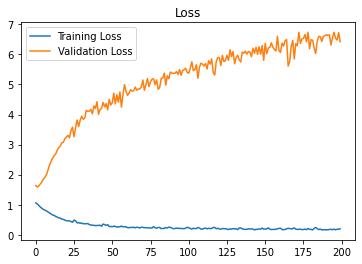

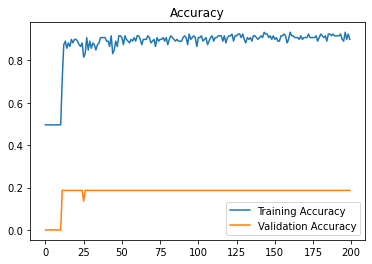

In [52]:
history = model_wine.history
plot_metrics(history)

In [45]:
import numpy as np
Y_pred=np.argmax(model.predict(X),axis=-1)

In [53]:
# Clasification report
from sklearn.metrics import classification_report
print(classification_report(y,Y_pred))

              precision    recall  f1-score   support

           0       0.75      0.97      0.84        59
           1       0.64      0.92      0.75        71
           2       0.00      0.00      0.00        48

    accuracy                           0.69       178
   macro avg       0.46      0.63      0.53       178
weighted avg       0.50      0.69      0.58       178



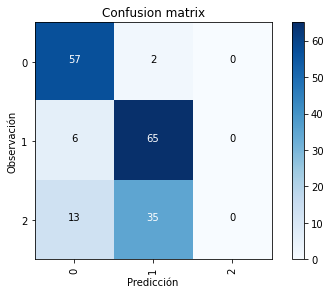

In [47]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

confusion_mtx = confusion_matrix(y, Y_pred) 
plot_confusion_matrix(confusion_mtx, classes = df["class"].unique())